In [73]:
## Manipulación de datos
import pandas as pd
import numpy as np

## Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os
import sys

## Modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

Con el modelo KNeighbors vamos a predecir si una orden tendra envio internacional o no.

In [74]:
df = pd.read_csv(r'..\..\data\processed\Merch_ML.csv',index_col='Order_ID')
df.head()

,Order_Date,Buyer_Age,Sales_Price,Shipping_Charges,Sales_per_Unit,Quantity,Total_Sales,Rating,Product_ID,Order_Location,International_Shipping,Buyer_Gender,Product_Category_Clothing,Product_Category_Ornaments,Product_Category_Other
Order_ID,,,,,,,,,,,,,,,
189440,2024-07-21,30,100,0,100,1,100,4,0,15,0,1,1.0,0.0,0.0
187385,2024-07-20,32,100,0,100,1,100,3,0,6,0,1,1.0,0.0,0.0
181844,2024-07-21,26,9,40,49,1,49,2,1,1,1,0,0.0,0.0,1.0
197934,2024-08-19,28,9,0,9,2,18,3,1,18,0,1,0.0,0.0,1.0
122470,2024-01-06,19,10,0,10,3,30,5,2,11,0,0,0.0,0.0,1.0


In [75]:
df['International_Shipping'].value_counts(normalize=True)

International_Shipping
0    0.695023
1    0.304977
Name: proportion, dtype: float64

Vemos que los datos estan un poco desbalanceados.

<Axes: >

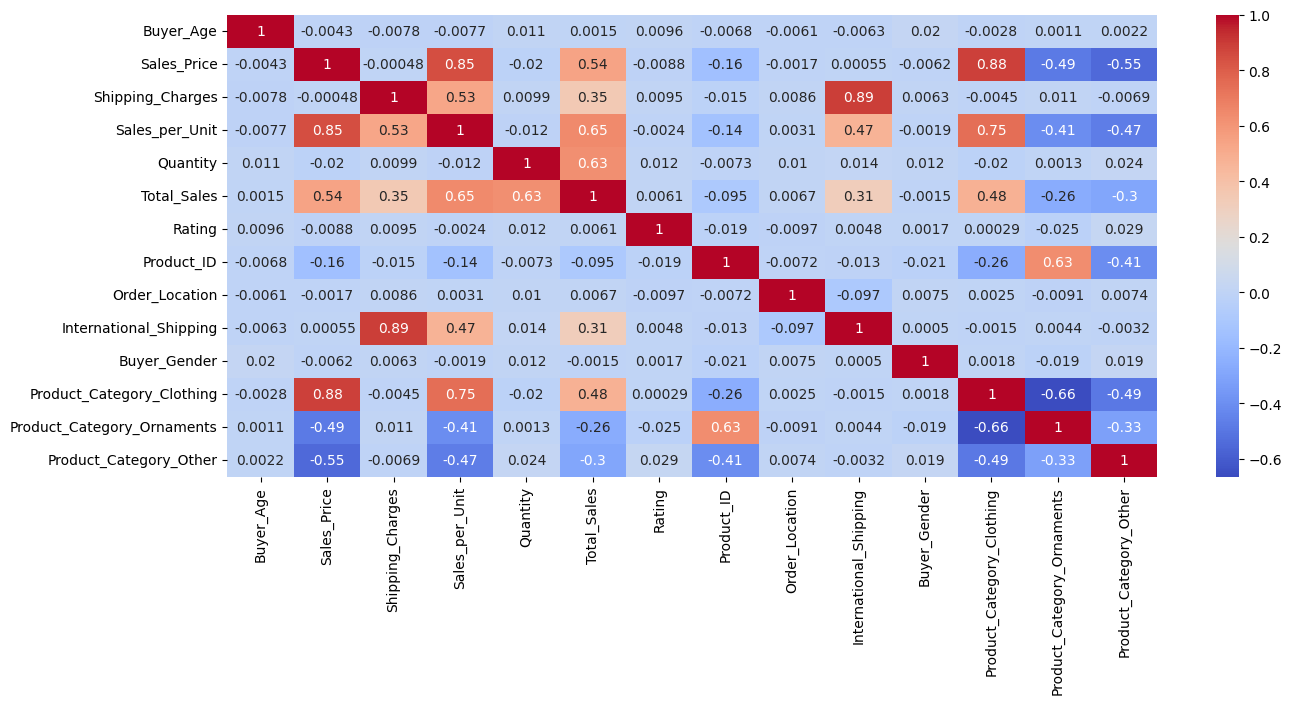

In [76]:
df_corr = df.drop(columns=['Order_Date']).corr()

plt.figure(figsize=(15,6))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)

Vemos que la target esta muy correlacionada con shipping charges, vamos a eliminarla para que el modelo no se aprenda solo este patron y no generalice correctamente.

In [77]:
X = df.drop(columns=['Order_Date','International_Shipping','Shipping_Charges'])
y = df['International_Shipping']

In [78]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.20,random_state=42)

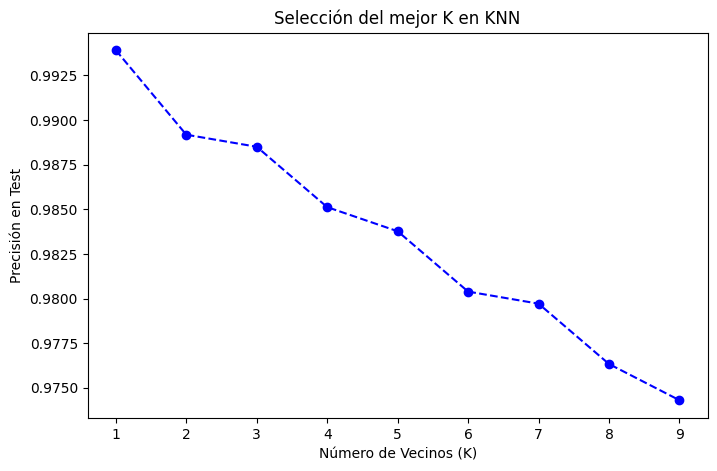

Mejor valor de K: 1 con accuracy de 0.9939


In [80]:
k_values = range(1, 10)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Número de Vecinos (K)")
plt.ylabel("Precisión en Test")
plt.title("Selección del mejor K en KNN")
plt.show()

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Mejor valor de K: {best_k} con accuracy de {max(accuracy_scores):.4f}")


In [81]:
knn =  KNeighborsClassifier(n_neighbors=1)

In [82]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)


In [83]:
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
y_pred_scaler = knn.predict(X_test_scaler)
print(confusion_matrix(y_test, y_pred_scaler))
print(classification_report(y_test, y_pred_scaler))

[[1027    2]
 [  12  438]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1029
           1       1.00      0.97      0.98       450

    accuracy                           0.99      1479
   macro avg       0.99      0.99      0.99      1479
weighted avg       0.99      0.99      0.99      1479

